In [11]:
from dolfin import (MPI, MeshFunction, MeshValueCollection,
                    UnitSquareMesh, cpp, plotting)
import pygmsh

In [17]:
%matplotlib inline

In [18]:
geom = pygmsh.opencascade.Geometry()

mesh_ele_size = .5
p0 = geom.add_point([0, 0, 0], lcar=mesh_ele_size)
p1 = geom.add_point([1, 0, 0], lcar=mesh_ele_size)
p2 = geom.add_point([1, 1, 0], lcar=mesh_ele_size)
p3 = geom.add_point([0, 1, 0], lcar=mesh_ele_size)

l0 = geom.add_line(p0, p1)
l1 = geom.add_line(p1, p2)
l2 = geom.add_line(p2, p3)
l3 = geom.add_line(p3, p0)

ll = geom.add_line_loop(lines=[l0, l1, l2, l3])
ps = geom.add_plane_surface(ll)

# Tag line and surface
geom.add_physical(l3, label="LINE")
geom.add_physical(ps, label="SURFACE")

pygmsh_mesh = pygmsh.generate_mesh(geom)
points, cells, cell_data = pygmsh_mesh.points, pygmsh_mesh.cells, pygmsh_mesh.cell_data

Info    : Running 'gmsh -3 /tmp/tmp8z7cc5d7.geo -format msh -bin -o /tmp/tmploiymtnc.msh' [Gmsh 4.4.0, 1 node, max. 1 thread]
Info    : Started on Mon Jul 29 13:13:17 2019
Info    : Reading '/tmp/tmp8z7cc5d7.geo'...
Info    : Done reading '/tmp/tmp8z7cc5d7.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Done meshing 1D (0 s)
Info    : Meshing 2D...
Info    : Meshing surface 6 (Plane, Delaunay)
Info    : Done meshing 2D (0.01 s)
Info    : Meshing 3D...
Info    : Done meshing 3D (0 s)
Info    : 13 vertices 28 elements
Info    : Writing '/tmp/tmploiymtnc.msh'...
Info    : Done writing '/tmp/tmploiymtnc.msh'
Info    : Stopped on Mon Jul 29 13:13:17 2019


In [31]:
mesh = cpp.mesh.Mesh(MPI.comm_world,
                     cpp.mesh.CellType.triangle, points[:,:2],
                     cells['triangle'], [], cpp.mesh.GhostMode.none)
assert mesh.degree() == 1
assert mesh.geometry.dim == 2
assert mesh.topology.dim == 2

In [32]:
f = MeshValueCollection("size_t", mesh, 1, cells["line"], cell_data["line"]['gmsh:physical'])

In [33]:
f.values()

{(1, 1): 1, (7, 1): 1}

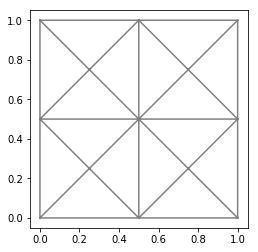

In [34]:
plotting.plot(mesh)

In [29]:
points[:,:2]

array([[ 0.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.5 ,  0.  ],
       [ 1.  ,  0.5 ],
       [ 0.5 ,  1.  ],
       [ 0.  ,  0.5 ],
       [ 0.5 ,  0.5 ],
       [ 0.25,  0.25],
       [ 0.75,  0.75],
       [ 0.25,  0.75],
       [ 0.75,  0.25]])